In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill)if pd.notna(skill)else skill)

In [3]:
df_eploted=df.explode('job_skills')
skill_stats=df_eploted.groupby('job_skills').agg(median_salary=('salary_year_avg','median')
                                                , skill_count=('job_skills','count'))
skill_stats=skill_stats.sort_values('skill_count',ascending=False).head(10)
skill_stats



,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


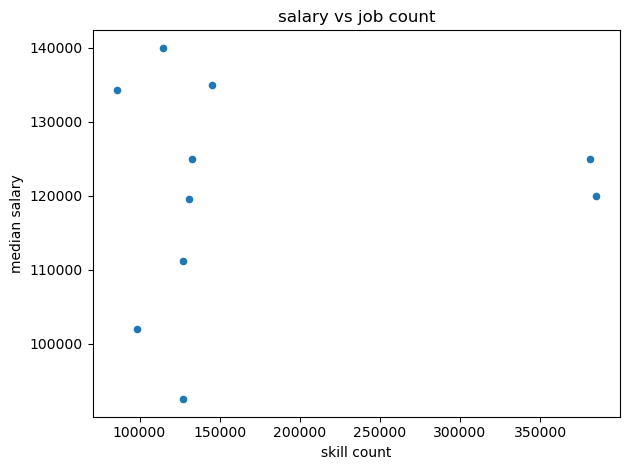

In [4]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('skill count')
plt.ylabel('median salary')
plt.title('salary vs job count')
plt.tight_layout()
plt.show()

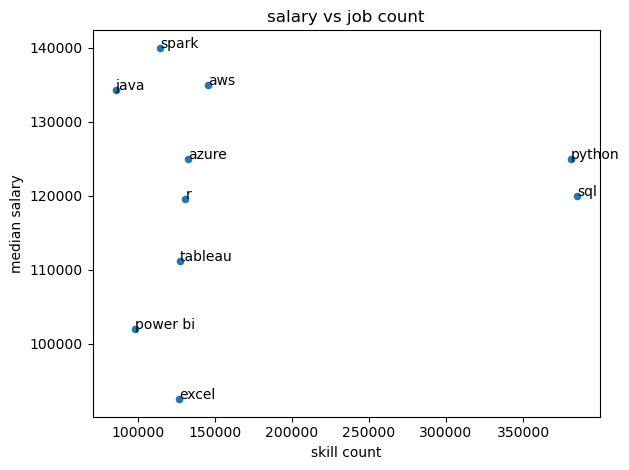

In [5]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)
plt.xlabel('skill count')
plt.ylabel('median salary')
plt.title('salary vs job count')
plt.tight_layout()
plt.show()    
    